# Compare optimizer

In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_1qubit, qtm.qtm_nqubit

In [2]:
num_qubits = 3
num_layers = 3
phis = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*10)

In [3]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_sgd = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.sgd,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [05:01<00:00,  3.01s/it]


In [4]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_adam = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [04:51<00:00,  2.91s/it]


In [3]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_qng = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [07:16<00:00,  4.37s/it]


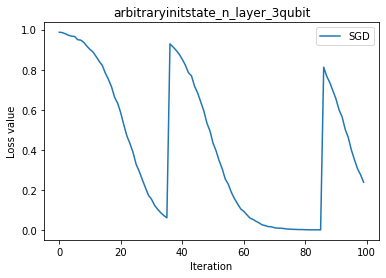

In [4]:
plt.plot(loss_values_qng, label='SGD', linestyle = '-')
plt.title('arbitraryinitstate_n_layer_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.show() 

In [5]:
np.min(loss_values_qng)

0.00048828125

In [6]:
thetas = np.zeros((num_layers*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values_qng_adam = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng_adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [05:17<00:00,  3.17s/it]


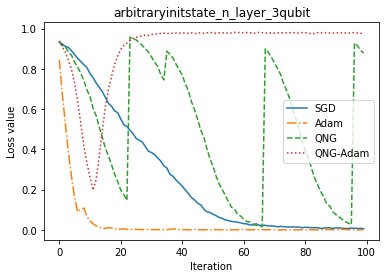

In [7]:
plt.plot(loss_values_sgd, label='SGD', linestyle = '-')
plt.plot(loss_values_adam, label='Adam', linestyle = '-.')
plt.plot(loss_values_qng, label='QNG', linestyle = '--')
plt.plot(loss_values_qng_adam, label='QNG-Adam', linestyle = ':')
plt.title('arbitraryinitstate_n_layer_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('arbitraryinitstate_n_layer_3qubit.png', format='png', dpi=600)
plt.show() 

np.savetxt("./compare/arbitraryinitstate_n_layer_3qubit/loss_values_sgd.csv", loss_values_sgd, delimiter=",")
np.savetxt("./compare/arbitraryinitstate_n_layer_3qubit/loss_values_adam.csv", loss_values_adam, delimiter=",")
np.savetxt("./compare/arbitraryinitstate_n_layer_3qubit/loss_values_qng.csv", loss_values_qng, delimiter=",")
np.savetxt("./compare/arbitraryinitstate_n_layer_3qubit/loss_values_qng_adam.csv", loss_values_qng_adam, delimiter=",")